# Decision Trees

Prerequisites:
   * Description: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
   * Dataset: https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view?pli=1

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer) 

In [114]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.tree import export_graphviz
import six
from IPython.display import Image  
import pydotplus

In [115]:
column_names = ['Variance','Skewness','Curtosis','Entropy','Class']
df = pd.read_csv('bill_authentication.csv', names = column_names, header = 0)
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [116]:
# select all columns except the "Class" column (results in a dataframe with all features)
X = df.drop('Class',axis=1)
# select only the "Class" column
Y = df['Class']

In [117]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state = 42)

In [118]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

In [119]:
clf = clf.fit(X_train,Y_train)

In [120]:
Y_pred = clf.predict(X_test)

In [121]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9855072463768116


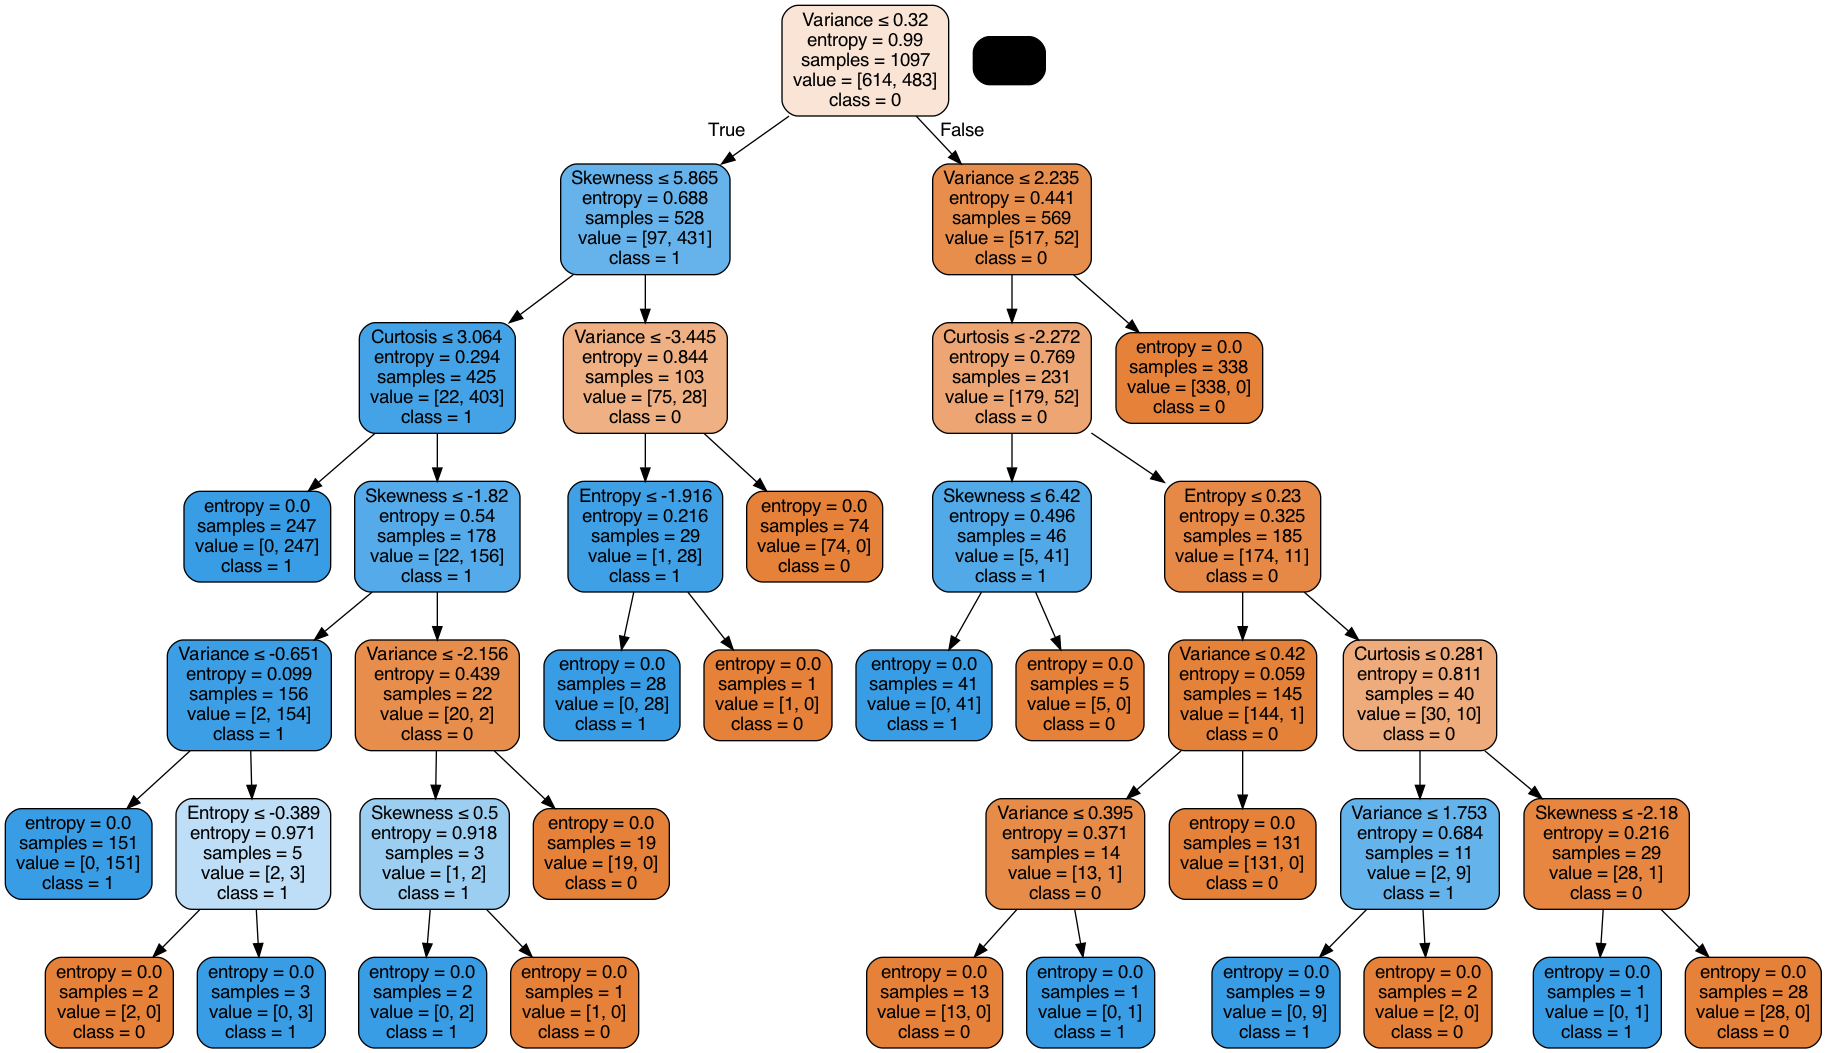

In [122]:
dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())